## ARIMA MODEL FOR AMZN STOCK PREDICTION

### Time Series Analysis

Any data that collectively represents how a system/process/behaviour changes over time is known as Time Series data. Time series forecasting uses information regarding historical values and associated patterns to predict future activity. In this project, we are going to predict tomorrow's closing price of Amazon Stock (AMZN) by analysing the stock data for over a time period(3 years) until today. Predicting the performance of stock market is one of the most difficult tasks as the share prices are highly volatile for various reasons. Thus, forecasting prices with high accuracy rates is is difficult. ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. 

### ARIMA

ARIMA (Auto-Regressive Integrated Moving Average) is a technique for modelling time series data for forecasting or predicting the future data points in the series by taking into consideration the following parameters:

1. Pattern or trend of growth/decline
2. Rate of change of growth/decline
3. Noise between consecutive data points



### Importing the necessary Libraries

In [25]:
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
import pandas_datareader.data as web
import datetime as dt
from datetime import date, timedelta
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import *
from matplotlib import style
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import warnings
rcParams['figure.figsize'] = 16,8

### Reading Data

Data is pulled from Yahoo Finance with start date as 1/1/2016 and end date as current date so as to take into consideration the most recent trend for better predictions.

In [3]:
start = dt.datetime(2016,1,1)
end = dt.datetime.today()

In [4]:
style.use('ggplot')

In [5]:
df = web.DataReader('AMZN', 'yahoo', start, end)

In [6]:
df.to_csv('amzn.csv')
df = pd.read_csv('amzn.csv', parse_dates = True, index_col = 0)

### Feature Description

The data pulled from Yahoo Finance is stored in a .csv file. The AMZN stock data has the following features:

1. Date - in format: yyyy-mm-dd
2. High - Highest price reached in the day
3. Low	 - Lowest price reached in the day
4. Open - price of the stock at market open 
5. Close - price of the stock at market close
6. Volume - Number of shares traded
7. Adj Close - stock's closing price on any given day of trading that has been amended to include any distributions and corporate actions that occurred at any time before the next day's open


In [7]:
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,657.719971,627.510010,656.289978,636.989990,9314500,636.989990
2016-01-05,646.909973,627.650024,646.859985,633.789978,5822600,633.789978
2016-01-06,639.789978,620.309998,622.000000,632.650024,5329200,632.650024
2016-01-07,630.000000,605.210022,621.799988,607.940002,7074900,607.940002
2016-01-08,624.140015,606.000000,619.659973,607.049988,5512900,607.049988


In [8]:
group = df.groupby('Date')
Daily_ClosePrice = group['Close'].mean()

Daily_ClosePrice.head()

Date
2016-01-04    636.989990
2016-01-05    633.789978
2016-01-06    632.650024
2016-01-07    607.940002
2016-01-08    607.049988
Name: Close, dtype: float64

In [9]:
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-11,1849.949951,1840.310059,1848.699951,1844.069946,2654800,1844.069946
2019-04-12,1851.500000,1841.300049,1848.400024,1843.060059,3114400,1843.060059
2019-04-15,1846.849976,1818.900024,1842.000000,1844.869995,3724400,1844.869995
2019-04-16,1869.770020,1848.000000,1851.349976,1863.040039,3040200,1863.040039
2019-04-17,1876.473022,1860.805054,1872.989990,1864.689941,2047982,1864.689941


In [10]:
# indexing the dataframe by Date
df['Date'] = df.index

In [11]:
# convert the date column into a time series with daily frequency

df['Date'] = pd.to_datetime(df['Date'])

In [12]:
indexed_df = df.set_index('Date')

In [13]:
ts = indexed_df['Adj Close']
ts.head()

Date
2016-01-04    636.989990
2016-01-05    633.789978
2016-01-06    632.650024
2016-01-07    607.940002
2016-01-08    607.049988
Name: Adj Close, dtype: float64

Text(0, 0.5, 'Adjusted Close Price')

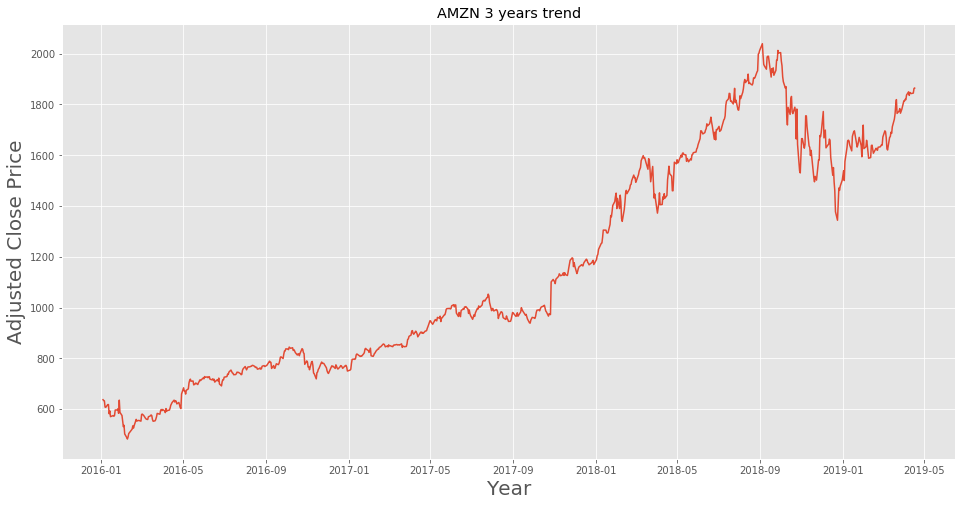

In [14]:
# visualize the time series to see how AMZN stock Close price trends over time
plt.figure(figsize=(16,8))
plt.plot(ts)
plt.title('AMZN 3 years trend')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Adjusted Close Price',fontsize=20)

In [15]:
# resampling by week

ts_week = ts.resample('W').mean()
ts_week

Date
2016-01-10     623.683997
2016-01-17     596.123999
2016-01-24     579.412506
2016-01-31     600.695996
2016-02-07     539.273999
2016-02-14     494.310004
2016-02-21     528.774994
2016-02-28     555.371997
2016-03-06     572.880005
2016-03-13     562.213989
2016-03-20     567.236011
2016-03-27     566.759995
2016-04-03     592.912000
2016-04-10     593.488000
2016-04-17     612.112000
2016-04-24     629.547998
2016-05-01     622.248010
2016-05-08     671.822009
2016-05-15     704.779993
2016-05-22     700.940002
2016-05-29     707.289990
2016-06-05     724.002487
2016-06-12     724.533997
2016-06-19     714.540002
2016-06-26     712.294006
2016-07-03     711.241992
2016-07-10     737.022491
2016-07-17     744.252014
2016-07-24     742.205994
2016-07-31     744.657996
                 ...     
2018-09-30    1979.947998
2018-10-07    1945.500024
2018-10-14    1799.591992
2018-10-21    1789.477979
2018-10-28    1729.436011
2018-11-04    1599.674023
2018-11-11    1698.688037
2018-11

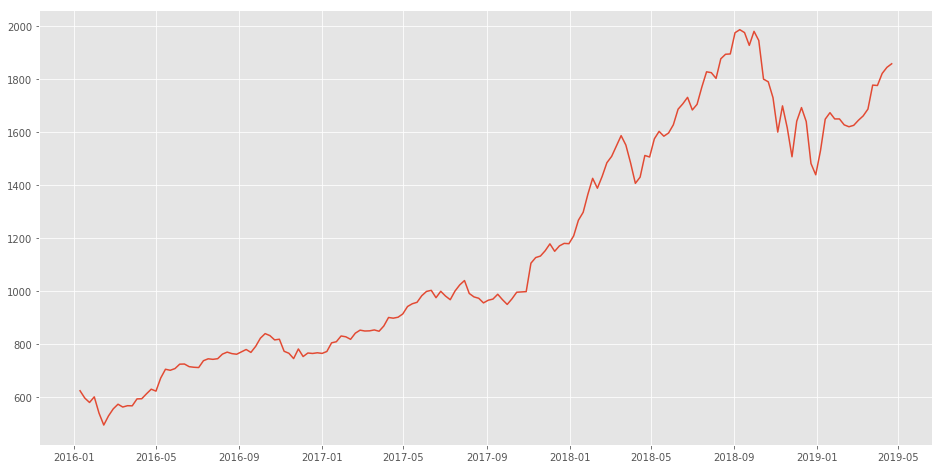

In [16]:
plt.figure(figsize=(16,8))
plt.plot(ts_week)

### Check for Stationarity of the Time series

Stationary Time Series data does not have any upward or downward trend or seasonal effects. Mean or variance are consistent over time

Non-Stationary Time Series data show trends, seasonal effects, and other structures depend on time. Forecasting performance is dependent on the time of observation. Mean and variance change over time and a drift in the model is captured.

We are using a statistical method called Dickey-Fuller test to check if our time series is stationary or not.

In [17]:
# check for stationarity

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52,center=False).mean() 
    rolstd = timeseries.rolling(window=52,center=False).std()

    #Plot rolling statistics:
    plt.figure(figsize=(16,8))
    orig = plt.plot(timeseries, color='green',label='AMZN Data')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.xlabel('Time(Days)',fontsize=15)
    plt.ylabel('$(Dollar)',fontsize=15)
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

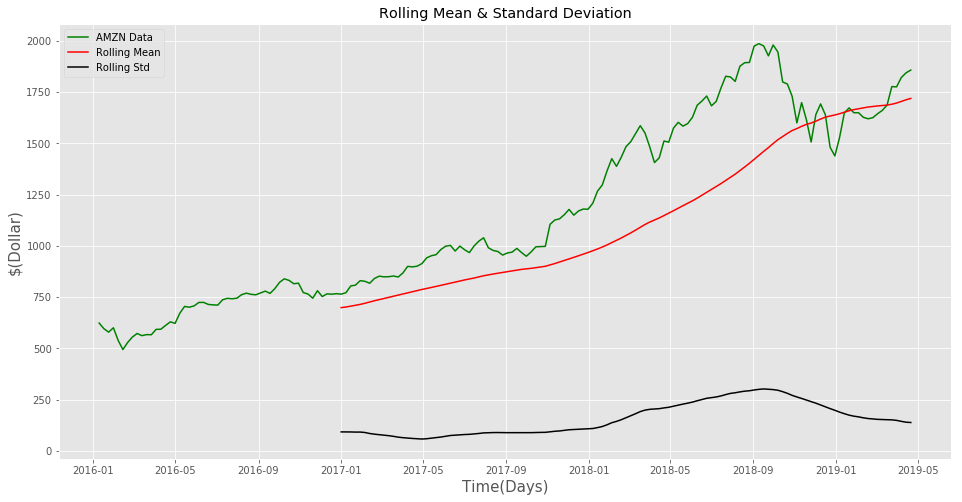

Results of Dickey-Fuller Test:
Test Statistic                  -0.336696
p-value                          0.920144
#Lags Used                       3.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64


In [18]:
test_stationarity(ts_week)

#### Because the test statistic is more than the 5% critical value and the p-value is larger than 0.05, the moving average is not constant over time and the null hypothesis of the Dickey-Fuller test cannot be rejected. This shows that the weekly time series is not stationary. Before you can apply ARIMA models for forecasting, you need to transform this time series into a stationary time series.

In [19]:
# apply a non linear log transform

ts_week_log = np.log(ts_week)

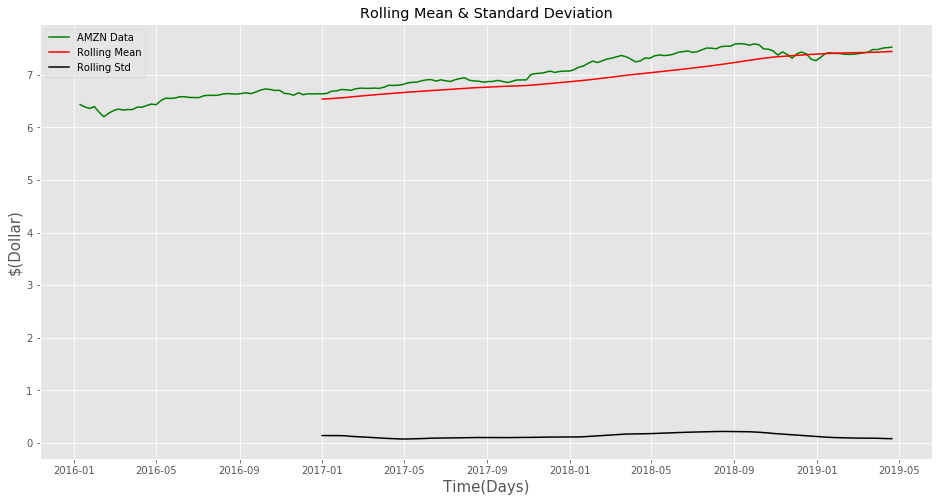

Results of Dickey-Fuller Test:
Test Statistic                  -0.800110
p-value                          0.819090
#Lags Used                       2.000000
Number of Observations Used    169.000000
Critical Value (1%)             -3.469648
Critical Value (5%)             -2.878799
Critical Value (10%)            -2.575971
dtype: float64


In [20]:
test_stationarity(ts_week_log)

#### The Dickey-Fuller test results confirm that the series is still non-stationary. Again the test statistic is larger than the 5% critical value and the p-value larger than 0.05

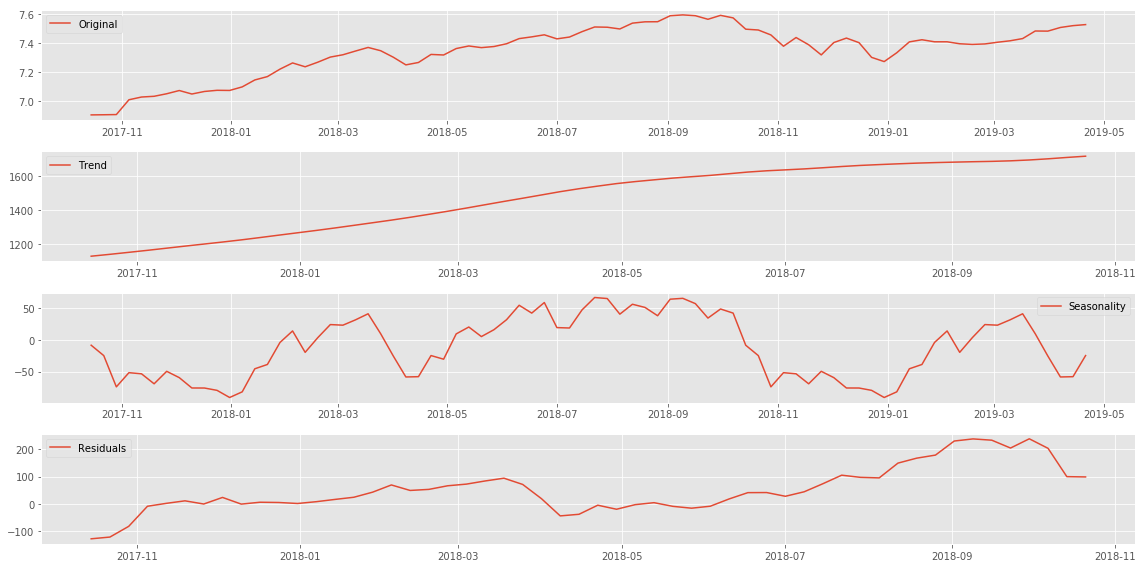

In [21]:
# remove trend and seasonality with decomposition

decomposition = seasonal_decompose(ts_week)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,8))
plt.subplot(411)
plt.plot(ts_week_log[-80:], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend[-80:], label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal[-80:],label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual[-80:], label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#### Time series are stationary if they do not have trend or seasonal effects. We are going to use the difference transform to remove the time series' dependence on time.

Text(0.5, 1.0, 'Seasonality')

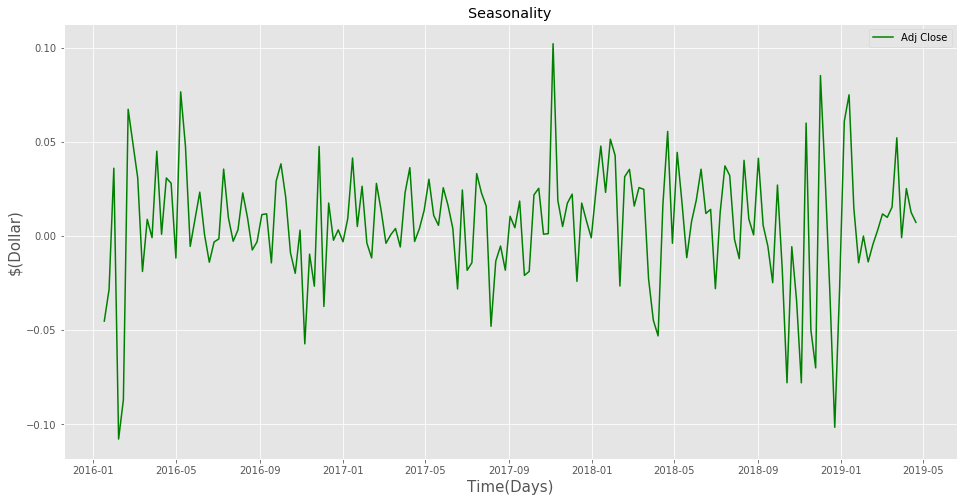

In [22]:
# remove trend and seasonality with differencing
ts_week_log_diff = ts_week_log - ts_week_log.shift()
plt.figure(figsize=(16,8))
plt.plot(ts_week_log_diff,color='green')
plt.legend(loc='best')
plt.xlabel('Time(Days)',fontsize=15)
plt.ylabel('$(Dollar)',fontsize=15)
plt.title('Seasonality')

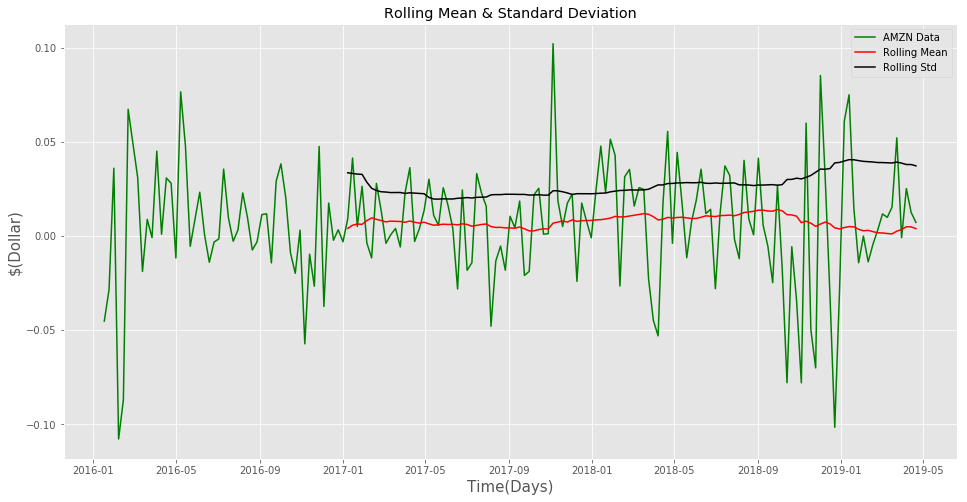

Results of Dickey-Fuller Test:
Test Statistic                -1.051978e+01
p-value                        9.750799e-19
#Lags Used                     1.000000e+00
Number of Observations Used    1.690000e+02
Critical Value (1%)           -3.469648e+00
Critical Value (5%)           -2.878799e+00
Critical Value (10%)          -2.575971e+00
dtype: float64


In [23]:
ts_week_log_diff.dropna(inplace=True)
test_stationarity(ts_week_log_diff)

#### The above graph shows how the rolling mean and rolling standard deviation are comparitively consistent over time after the time series transformation. We can proceed to use this transformed data for training our ARIMA model and forecasting the upcoming week's stock price.

### ARIMA Model

In [24]:
size = int(len(ts_week_log)*(0.7))
train, test = ts_week_log[0:size], ts_week_log[size:len(ts_week_log)]
history = [x for x in train]
predictions = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1)) #The order(p,d,q) of the model
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()[0]
    yhat = output[0]
    predictions.append(float(yhat))
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (np.exp(yhat), np.exp(obs)))

    
error = mean_squared_error(test, predictions)
r2 = r2_score(test, predictions)
print(r2)

print('\n')
print('Printing Mean Squared Error of Predictions...')
print('Test MSE: %.6f' % error)

Printing Predicted vs Expected Values...


predicted=1528.983898, expected=1505.739990
predicted=1504.060972, expected=1574.219995
predicted=1600.024712, expected=1602.504004
predicted=1607.180398, expected=1584.214014
predicted=1593.077852, expected=1596.387988
predicted=1612.777385, expected=1627.230011
predicted=1641.062973, expected=1686.132007
predicted=1703.884678, expected=1706.511987
predicted=1714.883264, expected=1730.908008
predicted=1747.346987, expected=1683.200000
predicted=1685.963080, expected=1704.524994
predicted=1728.300254, expected=1769.347998
predicted=1786.551382, expected=1827.202002
predicted=1841.621404, expected=1824.023999
predicted=1831.418871, expected=1802.289990
predicted=1815.453231, expected=1876.314014
predicted=1905.165531, expected=1893.441992
predicted=1898.339674, expected=1894.664014
predicted=1910.845933, expected=1974.737988
predicted=2001.804174, expected=1986.177490
predicted=1991.187391, expected=1975.243994
predicted=1992.194479, expected=1

In [26]:
predictions_series = pd.Series(predictions, index = test.index)

<Figure size 1152x576 with 0 Axes>

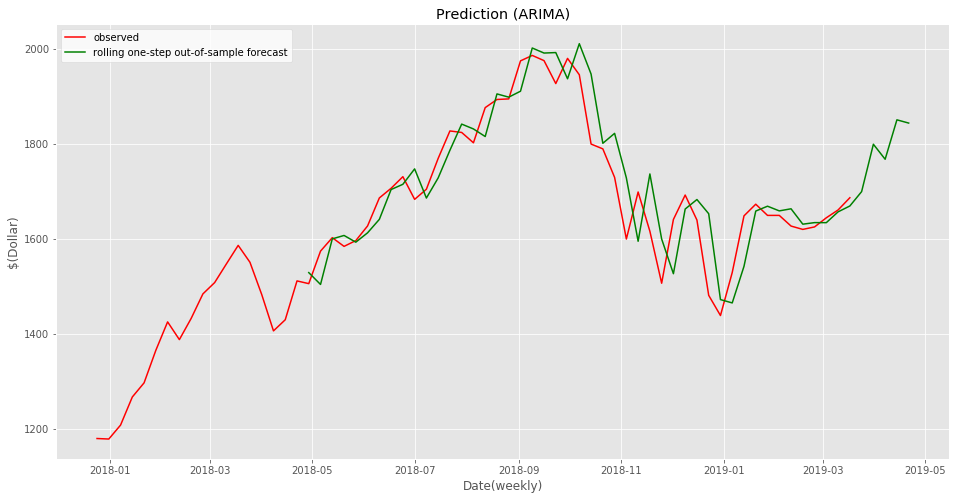

In [27]:
plt.figure(figsize=(16,8))
fig, ax = plt.subplots()
ax.set(title='Prediction (ARIMA)', xlabel='Date(weekly)', ylabel='$(Dollar)')
ax.plot(ts_week[-70:-5], label='observed', color='r')
ax.plot(np.exp(predictions_series), color='g', label='rolling one-step out-of-sample forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')

In [28]:
r2

0.7923840301727534

### Tuning hyper parameters for our ARIMA model

We are implementing grid search to find the best combination of p, d, q values for our model

In [29]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

order=(2,1,1)
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        # model_fit = model.fit(disp=0)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, (order))
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order,mse))
                except:
                    continue
    #print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(ts_week_log, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=3.645
ARIMA(0, 1, 1) RMSE=0.035
ARIMA(0, 1, 2) RMSE=0.034
ARIMA(0, 1, 3) RMSE=0.034
ARIMA(0, 1, 4) RMSE=0.035
ARIMA(0, 2, 1) RMSE=0.036
ARIMA(1, 0, 0) RMSE=0.035
ARIMA(1, 1, 0) RMSE=0.035
ARIMA(1, 2, 0) RMSE=0.044
ARIMA(2, 1, 0) RMSE=0.035
ARIMA(2, 1, 1) RMSE=0.034
ARIMA(2, 2, 0) RMSE=0.038
ARIMA(2, 2, 1) RMSE=0.036
ARIMA(2, 2, 3) RMSE=0.037
ARIMA(3, 1, 0) RMSE=0.034
ARIMA(3, 1, 2) RMSE=0.037
ARIMA(3, 2, 0) RMSE=0.039
ARIMA(3, 2, 1) RMSE=0.034
ARIMA(4, 0, 0) RMSE=0.034
ARIMA(4, 1, 0) RMSE=0.035
ARIMA(4, 2, 0) RMSE=0.037
ARIMA(4, 2, 1) RMSE=0.036


#### The combination of p,d,q values for which the RMSE is lowest is chosen as the best combination. In our case, there are multiple combinations with least RMSE of 0.034 and we will be comparing the accuracy of the corresponding model, to find the best one.

#### 1. Order = (0,1,2)

In [34]:
size = int(len(ts_week_log)*(0.7))
train, test = ts_week_log[0:size], ts_week_log[size:len(ts_week_log)]
history = [x for x in train]
predictions = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0)) #The order(p,d,q) of the model
    model_fit = model.fit(disp=5)
    output = model_fit.forecast()[0]
    yhat = output[0]
    predictions.append(float(yhat))
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (np.exp(yhat), np.exp(obs)))

    
error = mean_squared_error(test, predictions)
r2 = r2_score(test, predictions)
print(r2)

print('\n')
print('Printing Mean Squared Error of Predictions...')
print('Test MSE: %.6f' % error)

Printing Predicted vs Expected Values...


0.7892063236478076


Printing Mean Squared Error of Predictions...
Test MSE: 0.001331


#### Accuracy for Order = (0,1,2) is 78.92%

#### 2. Order = (0,1,3)

In [33]:
size = int(len(ts_week_log)*(0.7))
train, test = ts_week_log[0:size], ts_week_log[size:len(ts_week_log)]
history = [x for x in train]
predictions = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,3)) #The order(p,d,q) of the model
    model_fit = model.fit(disp=5)
    output = model_fit.forecast()[0]
    yhat = output[0]
    predictions.append(float(yhat))
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (np.exp(yhat), np.exp(obs)))

    
error = mean_squared_error(test, predictions)
r2 = r2_score(test, predictions)
print(r2)

print('\n')
print('Printing Mean Squared Error of Predictions...')
print('Test MSE: %.6f' % error)

Printing Predicted vs Expected Values...


0.7938573508085931


Printing Mean Squared Error of Predictions...
Test MSE: 0.001302


#### Accuracy for Order = (0,1,3) = 79.38%

#### 3. Order = (0,1,2)

In [30]:
size = int(len(ts_week_log)*(0.7))
train, test = ts_week_log[0:size], ts_week_log[size:len(ts_week_log)]
history = [x for x in train]
predictions = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,2)) #The order(p,d,q) of the model
    model_fit = model.fit(disp=5)
    output = model_fit.forecast()[0]
    yhat = output[0]
    predictions.append(float(yhat))
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (np.exp(yhat), np.exp(obs)))

    
error = mean_squared_error(test, predictions)
r2 = r2_score(test, predictions)
print(r2)

print('\n')
print('Printing Mean Squared Error of Predictions...')
print('Test MSE: %.6f' % error)

Printing Predicted vs Expected Values...


0.7949296954804518


Printing Mean Squared Error of Predictions...
Test MSE: 0.001295


In [31]:
predictions_series = pd.Series(predictions, index = test.index)

<Figure size 1152x576 with 0 Axes>

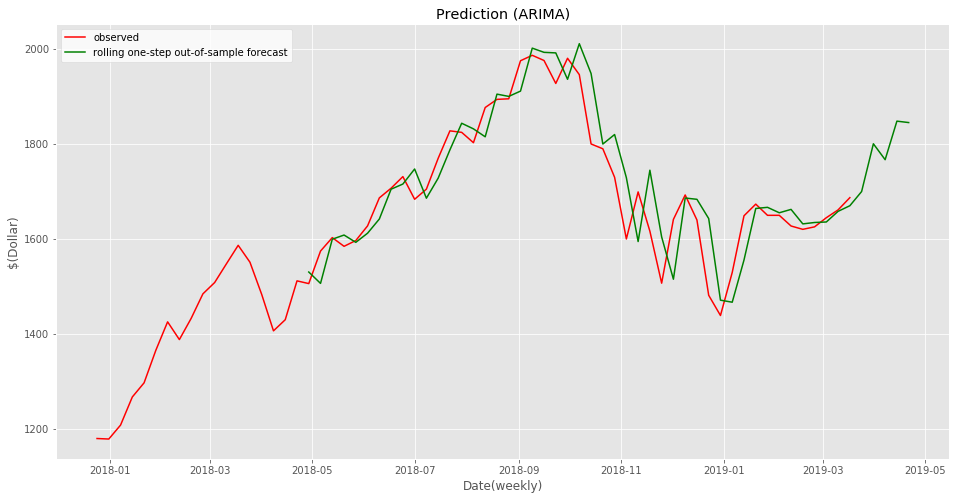

In [32]:
plt.figure(figsize=(16,8))
fig, ax = plt.subplots()
ax.set(title='Prediction (ARIMA)', xlabel='Date(weekly)', ylabel='$(Dollar)')
ax.plot(ts_week[-70:-5], label='observed', color='r')
ax.plot(np.exp(predictions_series), color='g', label='rolling one-step out-of-sample forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')

#### Accuracy for Order = (0,1,2) = 79.49%

### Observations

The above graph represents the comparison of our observed stock close prices vs forecasted close price for the upcoming week with an accuracy of 79.49%


In [1]:
from prettytable import PrettyTable

In [13]:
result_hyperparam = PrettyTable()

result_hyperparam.field_names = ["Model(ARIMA(p,d,q))", "Accuracy"]

result_hyperparam.add_row(['ARIMA(2,2,1)',79.23])
result_hyperparam.add_row(['ARIMA(0,1,3)',79.32])
result_hyperparam.add_row(['ARIMA(3,1,0)',78.92])
result_hyperparam.add_row(['ARIMA(0,1,2)',79.49])


print(result_hyperparam)

+---------------------+----------+
| Model(ARIMA(p,d,q)) | Accuracy |
+---------------------+----------+
|     ARIMA(2,2,1)    |  79.23   |
|     ARIMA(0,1,3)    |  79.32   |
|     ARIMA(3,1,0)    |  78.92   |
|     ARIMA(0,1,2)    |  79.49   |
+---------------------+----------+


In [11]:
result_predictedvsexpected = PrettyTable()

result_predictedvsexpected.field_names = ["date", "predicted","expected"]

result_predictedvsexpected.add_row(['2019-04-21',1843.78,1857.53])
result_predictedvsexpected.add_row(['2019-04-14',1847.59,1844.03])
result_predictedvsexpected.add_row(['2019-04-07',1766.52,1821.01])
result_predictedvsexpected.add_row(['2019-03-31',1799.97,1775.57])
result_predictedvsexpected.add_row(['2019-03-24',1699.47,1777.06])

print(result_predictedvsexpected)

+------------+-----------+----------+
|    date    | predicted | expected |
+------------+-----------+----------+
| 2019-04-21 |  1843.78  | 1857.53  |
| 2019-04-14 |  1847.59  | 1844.03  |
| 2019-04-07 |  1766.52  | 1821.01  |
| 2019-03-31 |  1799.97  | 1775.57  |
| 2019-03-24 |  1699.47  | 1777.06  |
+------------+-----------+----------+



### Conclusion

Predicting stock market prices is really a difficult task, as the market keeps changing continuously with time following a trend based on various factors. 
All Stock market data are a time series problem and we have analysed and transformed our Amazon stock price data treating its seasonality and trend as these affect the prediction.
We have modelled a ML algorithm called ARIMA(Auto-Regressive Integrated Moving Average) to forecast the stock market prices and tuned the hyper parameters to get a model that predicts with better accuracy.
